<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/Larange_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

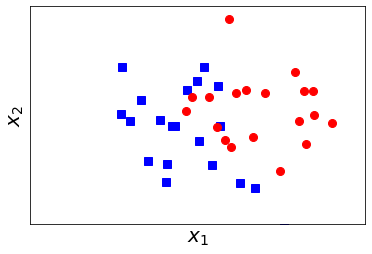

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov, N)

with PdfPages('data.pdf') as pdf:
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
    plt.axis('equal')
    plt.ylim(0, 4)
    plt.xlim(0, 5)

    # hide tikcs 
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    plt.xlabel('$x_1$', fontsize = 20)
    plt.ylabel('$x_2$', fontsize = 20)
    pdf.savefig()
    # plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
    plt.show()

In [8]:
X = np.vstack((X0, X1))
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))

In [9]:
from cvxopt import matrix, solvers
C=100
# build K
V = np.concatenate((X0.T, -X1.T), axis = 1)
K = matrix(V.T.dot(V))

p = matrix(-np.ones((2*N, 1)))
# build A, b, G, h 
G = matrix(np.vstack((-np.eye(2*N), np.eye(2*N))))

h = matrix(np.vstack((np.zeros((2*N, 1)), C*np.ones((2*N, 1)))))
A = matrix(y.reshape((-1, 2*N))) 
b = matrix(np.zeros((1, 1))) 
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])
print('lambda = \n', l.T)

lambda = 
 [[1.11381472e-06 9.99999967e+01 1.10533113e-06 6.70163542e-06
  3.40838760e+01 4.73972852e-06 9.99999978e+01 3.13320448e-06
  9.99999985e+01 5.06729333e+01 9.99999929e+01 3.23564236e-06
  9.99999984e+01 9.99999948e+01 1.37977626e-06 9.99997155e+01
  3.45005661e-06 1.46190315e-06 5.50601998e-06 1.45062544e-06
  1.85373848e-06 1.14181647e-06 8.47565685e+01 9.99999966e+01
  9.99999971e+01 8.00764711e-07 2.65537194e-06 1.45230729e-06
  4.15737086e-06 9.99999887e+01 9.99999761e+01 8.98414773e-07
  9.99999979e+01 1.75651608e-06 8.27947899e-07 1.04289117e-06
  9.99999969e+01 9.07920762e-07 8.83138298e-07 9.99999971e+01]]


In [10]:
S = np.where(l > 1e-5)[0] # for computing w
S2 = np.where(l < .99*C)[0]

M = [val for val in S if val in S2]# for computing b # intersection of two lists

lamda value=0 mean that datapoint is in right place (epxilon=0)

lamda value ~= C mean that datapoint is in opposite side (epxilon >1) or in margin right side (0< epxilon < 1)

lamda value 0<lamda<C mean that datapoint on margine line

w take all value of lamda that !=0

In [12]:
XT = X.T # we need each col is one data point in this alg
VS = V[:, S]
# XS = XT[:, S]
# yS = y[ S]
lS = l[S]
# lM = l[M]
yM = y[M]
XM = XT[:, M]
w_dual = VS.dot(lS).reshape(-1, 1)
b_dual = np.mean(yM.T - w_dual.T.dot(XM))


In [13]:
print(w_dual,b_dual)

[[-1.8745606 ]
 [-1.80692506]] 8.496650465370108


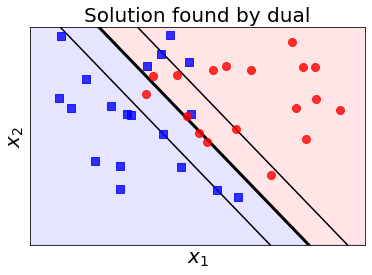

In [14]:
def myplot(X0, X1, w, b, filename, tit):
    with PdfPages(filename) as pdf:
        fig, ax = plt.subplots()

        w0 = w[0]
        w1 = w[1]
        x1 = np.arange(-10, 10, 0.1)
        y1 = -w0/w1*x1 - b/w1
        y2 = -w0/w1*x1 - (b-1)/w1
        y3 = -w0/w1*x1 - (b+1)/w1
        plt.plot(x1, y1, 'k', linewidth = 3)
        plt.plot(x1, y2, 'k')
        plt.plot(x1, y3, 'k')

        # equal axis and lim
        plt.axis('equal')
        plt.ylim(0, 3)
        plt.xlim(2, 4)

        # hide tikcs 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        # fill two regions
        y4 = 10*x1
        plt.plot(x1, y1, 'k')
        plt.fill_between(x1, y1, color='blue', alpha=0.1)
        plt.fill_between(x1, y1, y4, color = 'red', alpha = 0.1)

        plt.xlabel('$x_1$', fontsize = 20)
        plt.ylabel('$x_2$', fontsize = 20)
        plt.title('Solution found by ' + tit, fontsize = 20)

        plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
        plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
        pdf.savefig()
        plt.show()

myplot(X0, X1, w_dual, b_dual, 'svm_dual.pdf', 'dual')